In [10]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_size = (224, 224)

train_path = './Assignment-3/dataset/training/'
test_path = './Assignment-3/dataset/testing/'
val_path = './Assignment-3/dataset/validation/'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)
val_dtagen = ImageDataGenerator(rescale = 1.0 / 255)

In [4]:
train_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = img_size, 
    batch_size = 32, 
    class_mode = 'binary')

test_set = train_datagen.flow_from_directory(
    test_path, 
    target_size = img_size, 
    batch_size = 32, 
    class_mode = 'binary')

val_set = train_datagen.flow_from_directory(
    val_path, 
    target_size = img_size, 
    batch_size = 32, 
    class_mode = 'binary')

Found 468 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [5]:
model = Sequential()

model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.build(input_shape = (100, 224, 224, 1))

model.summary()

2023-01-22 18:28:51.580711: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mursalin/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-22 18:28:51.581403: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-22 18:28:51.581456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (m3c): /proc/driver/nvidia/version does not exist
2023-01-22 18:28:51.583359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fl

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 16)                12390416  
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                        

In [6]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=10,
    shuffle=True)

Epoch 1/10


2023-01-22 18:31:35.498568: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 403734528 exceeds 10% of free system memory.
2023-01-22 18:31:35.995061: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 396492800 exceeds 10% of free system memory.
2023-01-22 18:31:37.970956: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 396492800 exceeds 10% of free system memory.
2023-01-22 18:31:38.983210: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 403734528 exceeds 10% of free system memory.


 1/15 [=>............................] - ETA: 3:14 - loss: 0.7030 - accuracy: 0.4062

2023-01-22 18:31:43.495568: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 403734528 exceeds 10% of free system memory.


15/15 [==============================] - 120s 8s/step - loss: 0.3714 - accuracy: 0.8889 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 119s 8s/step - loss: 2.7726e-04 - accuracy: 1.0000 - val_loss: 2.3001e-06 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 149s 9s/step - loss: 1.2670e-06 - accuracy: 1.0000 - val_loss: 1.2935e-06 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 135s 9s/step - loss: 9.1346e-07 - accuracy: 1.0000 - val_loss: 6.9809e-07 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 126s 8s/step - loss: 4.4174e-07 - accuracy: 1.0000 - val_loss: 3.5695e-07 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 140s 9s/step - loss: 2.5451e-07 - accuracy: 1.0000 - val_loss: 2.2603e-07 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 143s 9s/step - loss: 1.6567e-07 - accuracy: 1.0000 - val_loss: 1.6742e-07

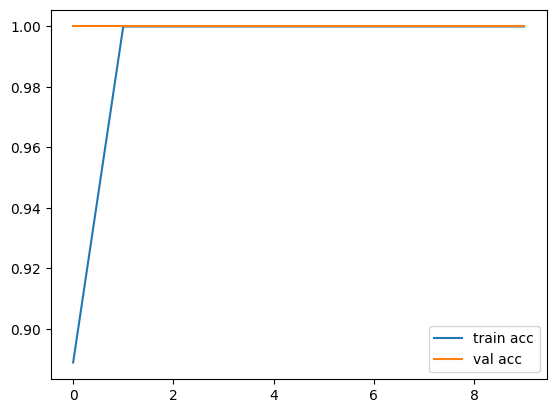

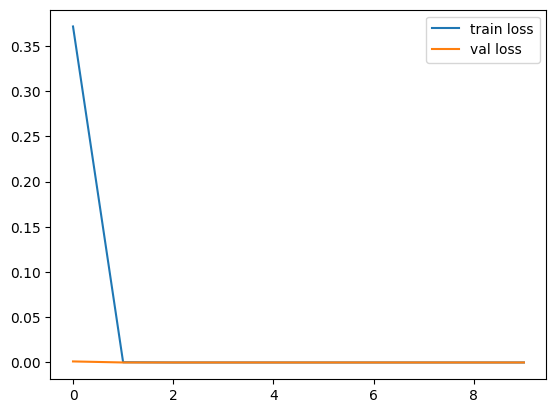

In [12]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
# plt.savefig('vgg-acc-rps-1.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
# plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [13]:
model.evaluate(test_set)

1/1 [==============================] - 4s 4s/step - loss: 1.0956e-07 - accuracy: 1.0000


[1.0956159712804947e-07, 1.0]